In [1]:
import os
import charts_function_list

In [2]:
base_path, data_folder,outputs = charts_function_list.folder_setup()

### Get the Data

In [3]:
os.chdir(data_folder)
population = pd.read_csv('census_city_population.csv')

In [20]:
population.columns.values

array(['Geography', '2015 City Population', 'Metro Population',
       'Sources: ACS 1-Year Estimate - 2015, Census Population Estimate - 2015'], dtype=object)

In [21]:
population['City_Pop_Thousand']=(population['2015 City Population']/1000).round(decimals=0).astype('int')
population['Metro_Pop_Thousand']=(population['Metro Population']/1000).round(decimals=0).astype('int')

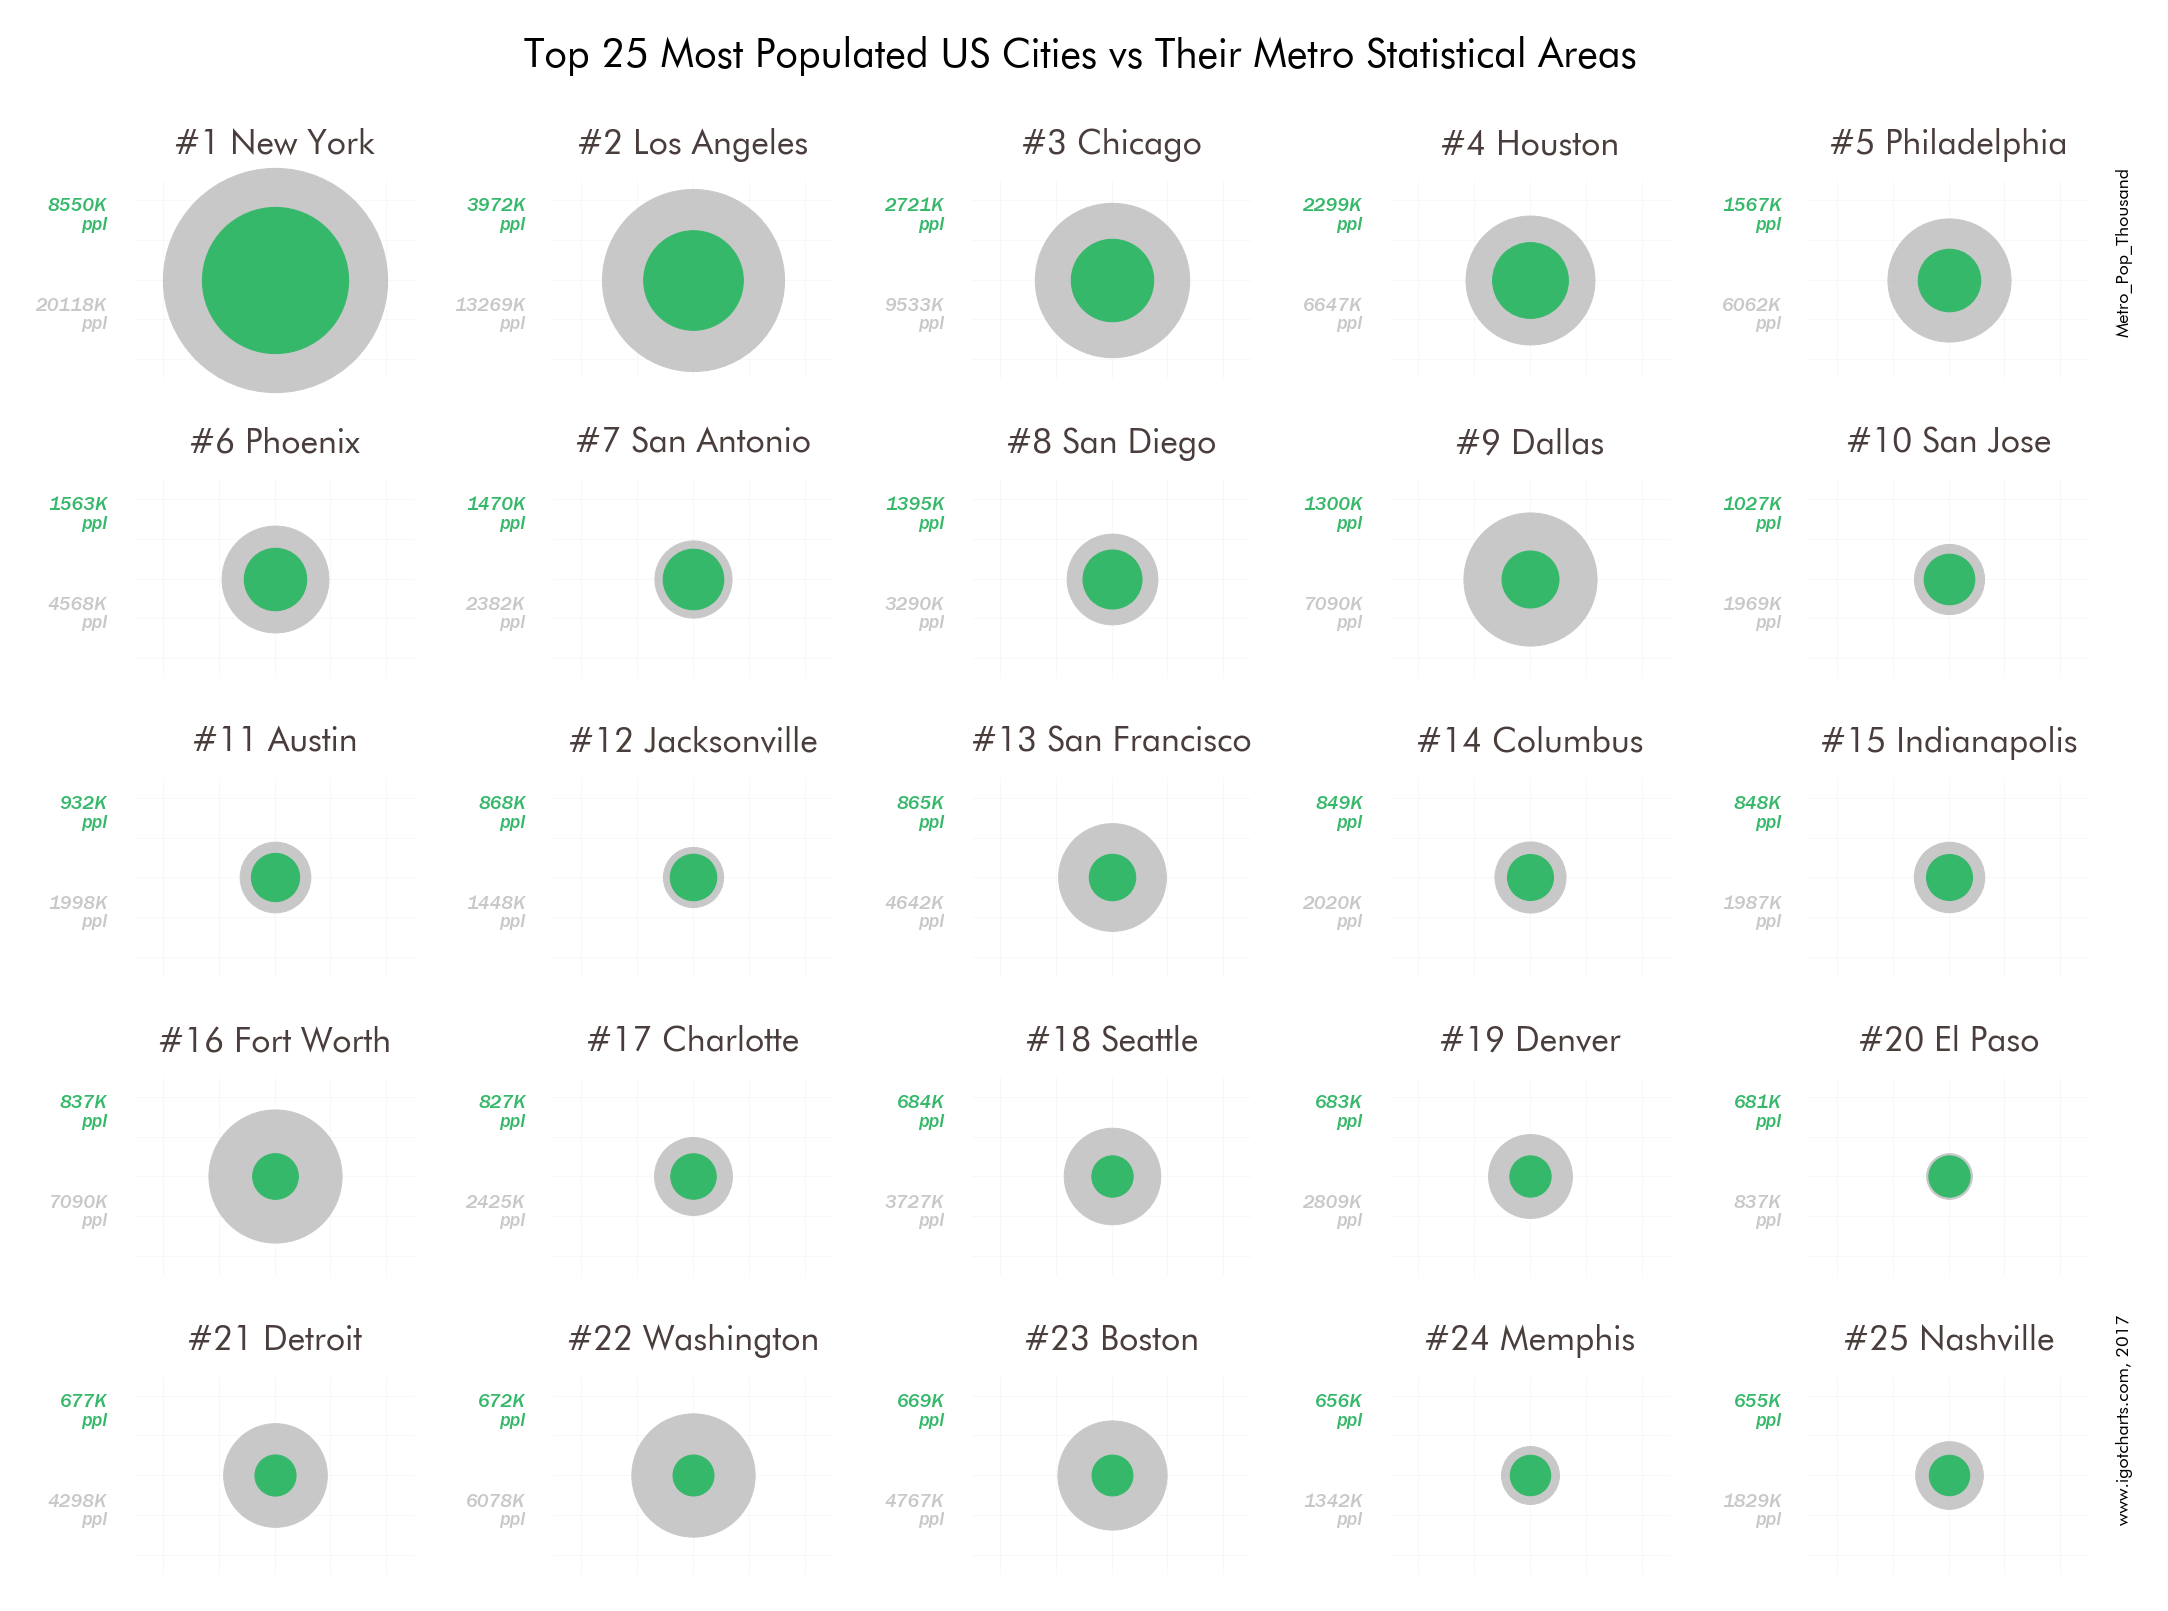

In [45]:
plt.rcParams["font.family"] = "Futura Bk BT"


fig = plt.figure(figsize=(35,25))
fig.suptitle('Top 25 Most Populated US Cities vs Their Metro Statistical Areas',size=40)
plt.subplots_adjust(top=0.9)

color1 ='#36B86A'
color2 ='#C8C8C8'

for item in range(25):
    ax = fig.add_subplot(5,5,item+1)
    
    ax.set_title('#'+str(item+1)+' '+population.ix[item]['Geography'],ha='center',size=34,alpha=1,color='#4A3E3D',position=(.5,1.1))
    plt.scatter(0,0,s=population.ix[item]['2015 City Population']/400,zorder=2,color=color1,clip_on=False,alpha=1)
    plt.scatter(0,0,s=population.ix[item]['Metro Population']/400,zorder=1,color=color2,clip_on=False,alpha=1)
    ax.set_ylim(-.5,.5)
    ax.text(-.1,.75,str(population['City_Pop_Thousand'][item])+'K'+'\nppl',transform=ax.transAxes,size=20,ha='right',
            fontname='Franklin Gothic Medium',color=color1,style='italic')
    ax.text(-.1,.25,str(population['Metro_Pop_Thousand'][item])+'K'+'\nppl',transform=ax.transAxes,size=20,ha='right',
            fontname='Franklin Gothic Medium',color=color2,style='italic')
    ax.set_xlim(-.5,.5)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
plt.text(1.1,7,population.columns.values[-1],size=18,rotation=90,transform=ax.transAxes)
plt.text(1.1,.25,'www.igotcharts.com, 2017',size=18,rotation=90,transform=ax.transAxes,va='bottom')
plt.show()
